# GGR274 Lab 8: Project Proposal and Comparing Two-samples

## Logistics

Like previous weeks, our lab grade will be based on attendance and submission of a few small tasks to MarkUs during the lab session (or by 23:59 on Thursday).

Complete the tasks in this Jupyter notebook and submit your completed file to [MarkUs](https://markus-ds.teach.cs.toronto.edu).
Here are the instructions for submitting to MarkUs (same as last week):

1. Download this file (`Lab_8.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **lab8** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)

Note: there's no autograding set up for this week's lab, but your TA will be checking that your submitted lab file is complete as part of your "lab attendance" grade.

### Piloting MarkUs JupyterHub Extension (optional)

We're piloting a new way to submit files to MarkUs directly from JupyterHub (without needing to download them). This is **optional** so you can still submit your work the usual way, but if you have some time please try it out by following the instructions on the [MarkUs Guide](../../../guides/markus_guide.ipynb).

## Lab Instructions and Learning Objectives

- Developing part of your project proposal

- Simulating the null hypothesis distribution for comparing two samples

## What Question will you answer in the final project?

Review the [sample final project questions](https://uoftcompdsci.github.io/ggr274-20231/project/presentation/GGR274videopresentation.html#final-project-questions).  

[Chapter 3](https://bookdown.org/rdpeng/artofdatascience/chapter-question.html) in [The Art of Data Science (Peng, R. and Matsui, E. (2017)](https://bookdown.org/rdpeng/artofdatascience/) discusses characteristics of a good Data Science question and translating a question into a data problem.

In this part of the tutorial you are going to look at part of the project proposal backwards.

a) Write a few bullet points describing the conclusions you hope to make or what you hope to learn from the project.

*Your answer goes here...*

b) What question will the conclusions answer?  Briefly describe the question using a few bullet points. 

*Answer goes here ...*

## Create a simulation of a null hypothesis


### Gender Bias in Promotion

- 1972 study on "sex role stereotypes on personnel decisions".
- 48 male managers were asked to rate whether several candidates were suitable for promotion.
- Managers were randomly assigned to review the file of either a male or female candidate.  The files were otherwise identical. 


B. Rosen and T.H. Jerdee (1974). Influence of sex role stereotypes on personnel decisions. *Journal of Applied Psychology* **59**(1), 9-14.

## What they found

Observed results | Male | Female | Total
-----------------|------|--------|------
Promoted |21 |14 |35
Not promoted |3 |10 |13  
Total |24 |24 |48


 
 - 21/24 = 87.5% of males were recommended for promotion
 - 14/24 = 58.3% of females were recommended for promotion

## The data

Data are in the DataFrame `bias`.

In [1]:
import pandas as pd
import numpy as np

sex = ['M'] * 24 + ['F'] * 24
promoted = ['Y'] * 21 + ['N'] * 3 + ['Y'] * 14 + ['N'] * 10

data = {'sex': sex, 'promoted': promoted}
bias = pd.DataFrame(data)

bias.head()

,sex,promoted
0,M,Y
1,M,Y
2,M,Y
3,M,Y
4,M,Y


## Task 1

a) The code in the cell below computes the proportion of promoted males `promoted_males` and females `promoted_females`. Complete the code below by filling in the `...`.

In [2]:
## Give this cell to students
# Fill in the ... below

promoted_males = (bias[bias['sex'] == ...]['promoted'] == ...).mean()

promoted_females = (bias[bias['sex'] == ...]['promoted'] == ...).mean()

In [3]:
# Solution
promoted_males = (bias[bias['sex'] == 'M']['promoted'] == 'Y').mean()

promoted_females = (bias[bias['sex'] == 'F']['promoted'] == 'Y').mean()

b) Use `promoted_males` and `promoted_females` to compute the observed mean difference in promoted Males minus promoted and store the value in `observed_diff`.

In [4]:
observed_diff = promoted_males - promoted_females

observed_diff

0.29166666666666663

## Task 2 - Simulate the null hypothesis

a) Randomly shuffle the column `sex` and assign the shuffled column to `bias_sex_shuffle`.

In [5]:
bias_sex_shuffle = bias['sex'].sample(frac = 1).reset_index(drop = True)

b) Use the shuffled labels to compute the mean number of males and females promoted.  Use `promoted_males_shuffled` and `promoted_females_shuffled` to calculate the proportions of males and females promoted when `sex` is randomly shuffled.  Store the result in `prop_males_shuffled` and `prop_females_shuffled`.

In [6]:
promoted_males_shuffled = (bias.loc[bias_sex_shuffle == 'M', 'promoted'] == 'Y')

promoted_females_shuffled = (bias.loc[bias_sex_shuffle == 'F', 'promoted'] == 'Y')

# Fill in the ... below

prop_males_shuffled = ...

prop_females_shuffled = ...

In [7]:
# answer cell

promoted_males_shuffled = (bias.loc[bias_sex_shuffle == 'M', 'promoted'] == 'Y')

promoted_females_shuffled = (bias.loc[bias_sex_shuffle == 'F', 'promoted'] == 'Y')

prop_males_shuffled = promoted_males_shuffled.mean()

prop_females_shuffled = promoted_females_shuffled.mean()


c) Calculate the difference between `prop_males_shuffled` and `prop_females_shuffled`.  Store the value in `diff_sim`.

In [8]:
diff_sim = prop_males_shuffled - prop_females_shuffled

diff_sim

-0.20833333333333337

## Task 3 - Iterate Task 2 

In this task you will use a `for` loop to iterate Task 2 steps a) - c) 5000 times.  Store the results in a list called `sim_results`. 

To complete this Task, copy and paste your answers from Task 2 a), b), c) into the following code below.

In [ ]:
sim_results = []

for _ in range(5000):
    # paste the code from above here

    # Then, fill in the ... below
    sim_results.append(...)

In [9]:
sim_results = []

for _ in range(5000):
    bias_sex_shuffle = bias['sex'].sample(frac = 1).reset_index(drop = True)
    promoted_males_shuffled = (bias.loc[bias_sex_shuffle == 'M', 'promoted'] == 'Y')
    promoted_females_shuffled = (bias.loc[bias_sex_shuffle == 'F', 'promoted'] == 'Y')
    prop_males_shuffled = promoted_males_shuffled.mean()
    prop_females_shuffled = promoted_females_shuffled.mean()
    diff_sim = prop_males_shuffled - prop_females_shuffled
    sim_results.append(diff_sim)

## Task 4 - Plot the null hypothesis distribution 

Use `matplotlib.pyplot` to plot `sim_results`.

(array([  22.,  109.,  375.,  772., 1199., 1209.,  821.,  356.,  115.,
          22.]),
 array([-0.45833333, -0.36666667, -0.275     , -0.18333333, -0.09166667,
         0.        ,  0.09166667,  0.18333333,  0.275     ,  0.36666667,
         0.45833333]),
 <BarContainer object of 10 artists>)

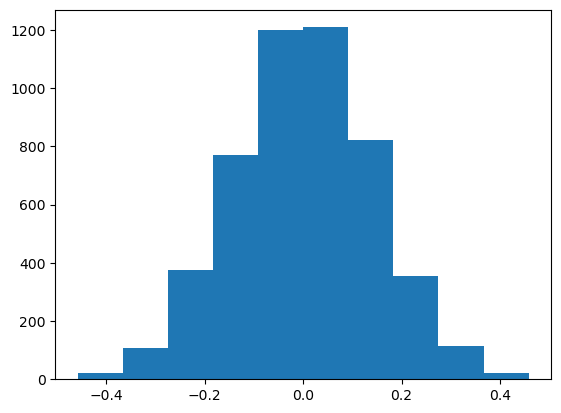

In [10]:
# This import is provided for you (do not change it)
import matplotlib.pyplot as plt

plt.hist(sim_results)

## Task 5 - Evidence

Is there evidence that the difference in males versus females promoted was not due to chance?

*Your answer goes here...*

The p-value of the test is below.

In [11]:
pvalue = ((sim_results >= observed_diff).sum() + (sim_results < -1 * observed_diff).sum()) / 5000

pvalue

0.0318

2.7% of the simulations were more extreme than the observed value of the difference assuming that the labels M, F were randomly shuffled. It's unlikely that the difference is due to random chance.  This means that this data supports that males were promoted more often than females.